<a href="https://colab.research.google.com/github/Shivayogi-A/Pyspark_programming/blob/master/repartion()_and_coalesce().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# repartition()
The repartition() method in PySpark redistributes (increase or decrease partitions) data evenly across a specified number of partitions, optimizing parallelism and resource usage.

It triggers a full shuffle of data and is useful for adjusting the partitioning scheme for downstream operations like joins and aggregations.

This example expands the number of partitions from 5 to 6 by redistributing data across all partitions.

In [ ]:
#Syntax of repartition()
df.repartition("no of partitions")

#consider the below example
# DataFrame example
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com') \
        .master("local[5]").getOrCreate()

df=spark.range(0,20)
print(df.rdd.getNumPartitions())

df.write.mode("overwrite").csv("c:/tmp/partition.csv")

The above example creates 5 partitions as specified in master("local[5]") and the data is distributed across all these 5 partitions.

**Output:**
Partition 1 : 0 1 2 3\
Partition 2 : 4 5 6 7\
Partition 3 : 8 9 10 11\
Partition 4 : 12 13 14 15\
Partition 5 : 16 17 18 19

In [ ]:
# DataFrame repartition - we will repartition the df to 6 now
df2 = df.repartition(6)
print(df2.rdd.getNumPartitions())


**Output:**\
Partition 1 : 14 1 5\
Partition 2 : 4 16 15\
Partition 3 : 8 3 18\
Partition 4 : 12 2 19\
Partition 5 : 6 17 7 0\
Partition 6 : 9 10 11 13

And, even decreasing the partitions also results in moving data from all partitions. hence when you wanted to decrease the partition recommendation is to use coalesce()




# coalesce()
Spark coalesce() is used only to decrease the number of partitions. This is an optimized or improved version of repartition() where the movement of the data across the partitions is fewer using coalesce.



In [ ]:
# DataFrame coalesce
df3 = df.coalesce(2)
print(df3.rdd.getNumPartitions())

This yields output 2 and the resultant partition looks like

**Output:**
Partition 1 : 0 1 2 3 8 9 10 11\
Partition 2 : 4 5 6 7 12 13 14 15 16 17 18 19

Since we are reducing 5 to 2 partitions, the data movement happens only from 3 partitions and it moves to remain 2 partitions.

**Difference between Repartition and Coalesce**

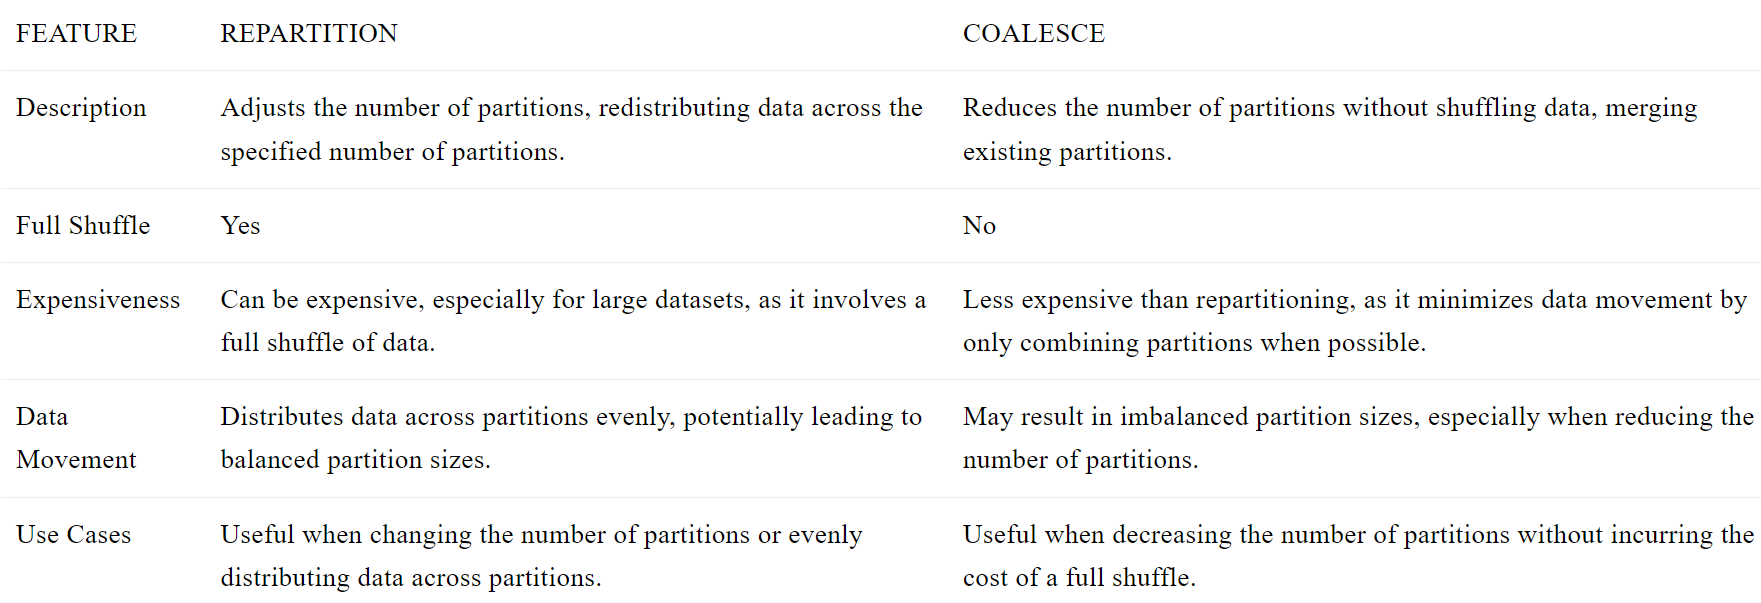